# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)


colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


## Análise das variáveis numéricas


### Histogramas

Um histograma é uma representação gráfica da distribuição de frequências de uma variável. Ele é um gráfico de barras onde cada barra representa uma classe ou intervalo de classe e a área de cada barra é proporcional à frequência da classe. O histograma é uma ferramenta útil para visualizar a forma da distribuição de uma variável. Ele permite identificar a presença de assimetria e a presença de outliers.

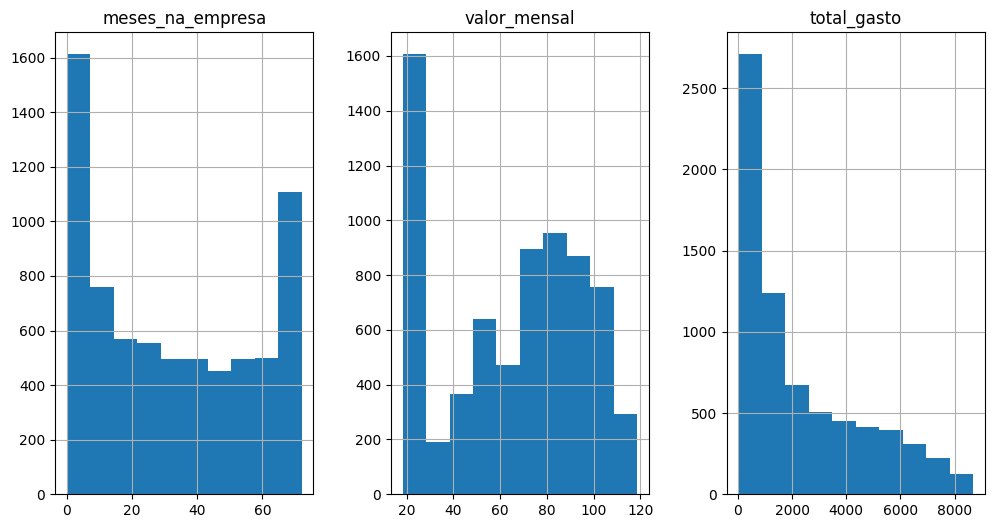

In [4]:
df_churn[colunas_numericas].hist(layout=(1, 3), figsize=(12,6));

In [5]:
df_churn['meses_na_empresa'].value_counts(bins=10).sort_index()

(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64

Com o Seaborn, podemos plotar um histograma com a opção `hue` para separar os dados de acordo com uma variável categórica. Neste caso, vamos separar os dados de acordo com a variável `contrato`. Dessa forma, podemos comparar a distribuição de cada variável numérica de acordo com o tipo de contrato.

<Axes: xlabel='meses_na_empresa', ylabel='Count'>

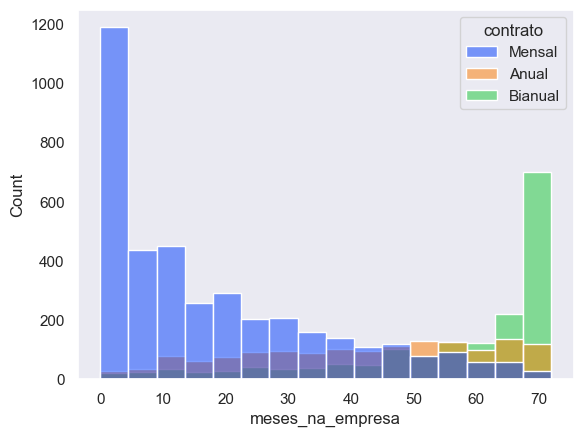

In [6]:
sns.set_theme(style='dark', palette='bright', context='notebook')

sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato')

<Axes: xlabel='meses_na_empresa', ylabel='Count'>

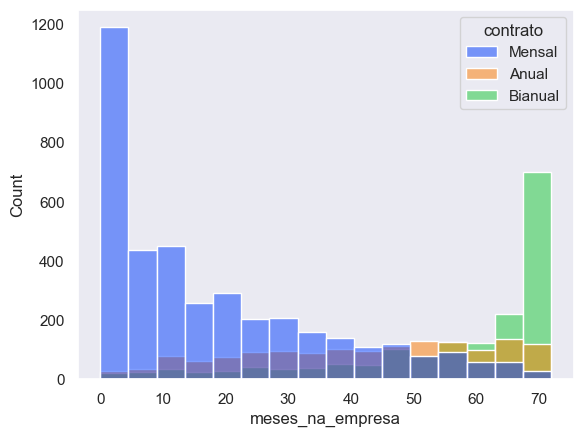

In [ ]:
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato', multiple='stack')

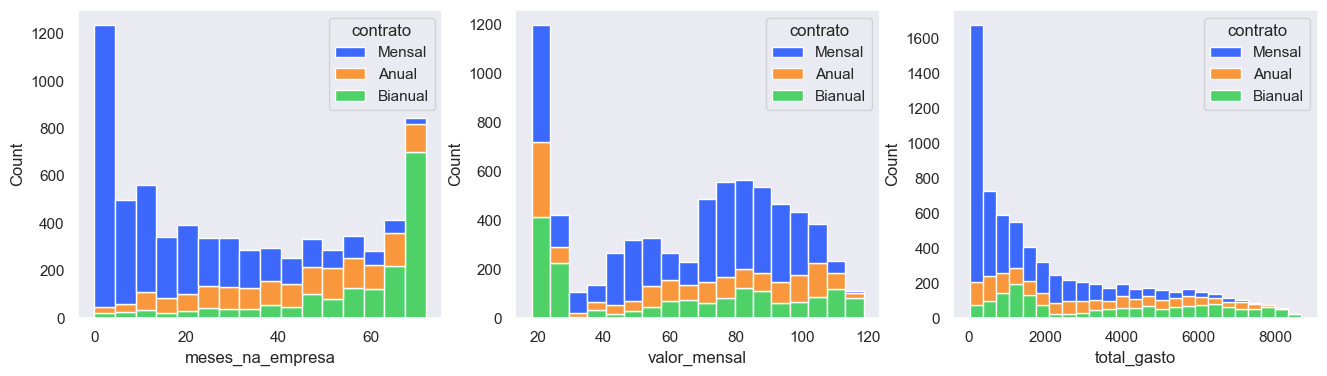

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i])

plt.show()

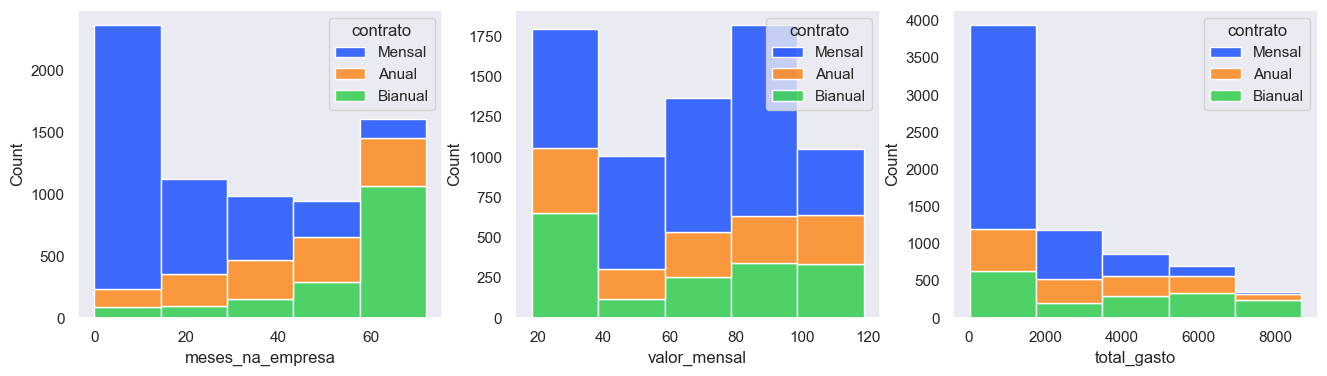

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i], bins=5)

plt.show()